In [2]:
import sys
import re
import os

import numpy as np
import pandas
import matplotlib.pyplot as plt
import ternary
import json

sys.path.append("..")
from ternary_calculate import TernaryCalculate as tc
from antisolvent_calculate import AntisolventCalculate as ac

In [8]:
# mpl plot style formatting

mpl_style_path = "/Users/parkhyuntae/Library/CloudStorage/GoogleDrive-prohyuntae@gmail.com/My Drive/projects/mpl_styles"
plt.style.use(mpl_style_path + "/myacademic.mplstyle")


from cycler import cycler

wred = "#920527"
wblk = "#252427"
wblu = "#094C90"
wgra = "#757A7D"
wgrn = "#81990B"
wbrw = "#714D2A"
wyel = "#FDD003"
worg = "#D08B16"
wcya = "#02A0DA"
plt.rc(
    "axes",
    prop_cycle=(
        cycler("color", [wblk, wred, wblu, wgra, wgrn, wbrw, wyel, worg, wcya])
    ),
)

In [9]:
# Solute properties
ibuprofen = {
    "temp_melt": 349.4,
    "enth_fus": 27940,
    "file": "../cosmo_file/UD1264.cosmo",
    "name": "IBUPROFEN",
}

acetaminophen = {
    "temp_melt": 443.15,
    "enth_fus": 27600,
    "file": "../cosmo_file/UD1449.cosmo",
    "name": "ACETAMINOPHEN",
}

In [10]:
# Load solvent data
with open("./data/solvent_properties.json", "r") as solvent_json:
    solvent_data = json.load(solvent_json)

# Load antisolvent data
with open("./data/antisolvent_properties.json", "r") as antisolv_json:
    antisolv_data = json.load(antisolv_json)

In [11]:
# Generate calculation data for ibuprofen
ibu_system = tc()
ibu_system.add_solute(**ibuprofen)

# 1st solvent - ethanol
ibu_system.add_solvent(**solvent_data[0])
for antisolvent in antisolv_data:
    ibu_system.add_antisolvent(**antisolvent)
    calculator = ac(ibu_system, trace=False)
    _ = calculator.get_data(
        export="csv",
        file_name=f"./data/ibuprofen_calculation/{ibu_system.mole_name[0]}_{ibu_system.mole_name[1]}_{ibu_system.mole_name[2]}",
    )
    ibu_system.clear_antisolvent()

# 2nd solvent - acetone
ibu_system.add_solvent(**solvent_data[1])
for antisolvent in antisolv_data:
    ibu_system.add_antisolvent(**antisolvent)
    calculator = ac(ibu_system, trace=False)
    _ = calculator.get_data(
        export="csv",
        file_name=f"./data/ibuprofen_calculation/{ibu_system.mole_name[0]}_{ibu_system.mole_name[1]}_{ibu_system.mole_name[2]}",
    )
    ibu_system.clear_antisolvent()

System: IBUPROFEN-ETHANOL-ETHYLENE_GLYCOL
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-ACETIC_ACID
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-PHENOL
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-BENZENE
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-TOLUENE
Initializing system...
Initialize complete!
System: IBUPROFEN-ETHANOL-N-BUTANE
Initializing system...
Initialize complete!
System: IBUPROFEN-ACETONE-ETHYLENE_GLYCOL
Initializing system...
Initialize complete!
System: IBUPROFEN-ACETONE-ACETIC_ACID
Initializing system...
Initialize complete!
System: IBUPROFEN-ACETONE-PHENOL
Initializing system...
Initialize complete!
System: IBUPROFEN-ACETONE-BENZENE
Initializing system...
Initialize complete!
System: IBUPROFEN-ACETONE-TOLUENE
Initializing system...
Initialize complete!
System: IBUPROFEN-ACETONE-N-BUTANE
Initializing system...
Initialize complete!


In [12]:
# Generate calculation data for acetaminophen
acet_system = tc()
acet_system.add_solute(**acetaminophen)

# 1st solvent - dimethyl sulfoxide
acet_system.add_solvent(**solvent_data[2])
for antisolvent in antisolv_data:
    acet_system.add_antisolvent(**antisolvent)
    calculator = ac(acet_system, trace=False)
    _ = calculator.get_data(
        export="csv",
        file_name=f"./data/acetaminophen_calculation/{acet_system.mole_name[0]}_{acet_system.mole_name[1]}_{acet_system.mole_name[2]}",
    )
    acet_system.clear_antisolvent()

# 2nd solvent - n,n-dimethylformamide
acet_system.add_solvent(**solvent_data[3])
for antisolvent in antisolv_data:
    acet_system.add_antisolvent(**antisolvent)
    calculator = ac(acet_system, trace=False)
    _ = calculator.get_data(
        export="csv",
        file_name=f"./data/acetaminophen_calculation/{acet_system.mole_name[0]}_{acet_system.mole_name[1]}_{acet_system.mole_name[2]}",
    )
    acet_system.clear_antisolvent()

System: ACETAMINOPHEN-DIMETHYL_SULFOXIDE-ETHYLENE_GLYCOL
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-DIMETHYL_SULFOXIDE-ACETIC_ACID
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-DIMETHYL_SULFOXIDE-PHENOL
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-DIMETHYL_SULFOXIDE-BENZENE
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-DIMETHYL_SULFOXIDE-TOLUENE
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-DIMETHYL_SULFOXIDE-N-BUTANE
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-n,n-dimethylformamide-ETHYLENE_GLYCOL
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-n,n-dimethylformamide-ACETIC_ACID
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-n,n-dimethylformamide-PHENOL
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-n,n-dimethylformamide-BENZENE
Initializing system...
Initialize complete!
System: ACETAMINOPHEN-n,n-dimethylf

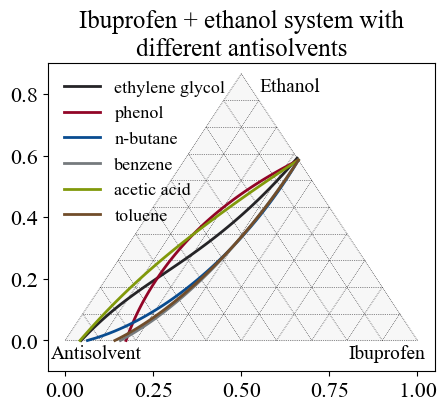

In [13]:
# Plot ternary diagrams

# ibuprofen + ethanol system
ibu_directory = "./data/ibuprofen_calculation"
pattern = "IBUPROFEN_ETHANOL_"

ibu_files = os.listdir(ibu_directory)
ibu_ethanol_files = [filename for filename in ibu_files if re.match(pattern, filename)]

fig1, tax = ternary.figure()
fig1.set_size_inches(5, 4)
plt.grid(False)
tax.gridlines(multiple=0.1)
tax.set_title(f"Ibuprofen + ethanol system with\ndifferent antisolvents")
tax.right_corner_label("Ibuprofen", fontsize=14, position=(0.85, 0.05))
tax.top_corner_label("Ethanol", fontsize=14, position=(0.1, 1.05))
tax.left_corner_label("Antisolvent", fontsize=14, position=(0.1, 0.05))

for filename in ibu_ethanol_files:
    filename_split = filename.split("_")
    if len(filename_split) == 3:
        antisolv_name = filename_split[2].lower()
    else:
        antisolv_name = filename_split[2] + " " + filename_split[3]
        antisolv_name = antisolv_name.lower()
    filepath = os.path.join(ibu_directory, filename)
    read_cols = [
        "solute_mol_fraction",
        "solvent_mol_fraction",
        "antisolvent_mol_fraction",
    ]
    ternary_data = pandas.read_csv(filepath, usecols=read_cols)
    ternary_data = ternary_data.values
    tax.plot(ternary_data, linewidth=2.0, label=antisolv_name)

plt.legend(loc="best", fontsize=13)
plt.savefig("./figures/ibuprofen_ethanol_ternary.png", bbox_inches="tight")

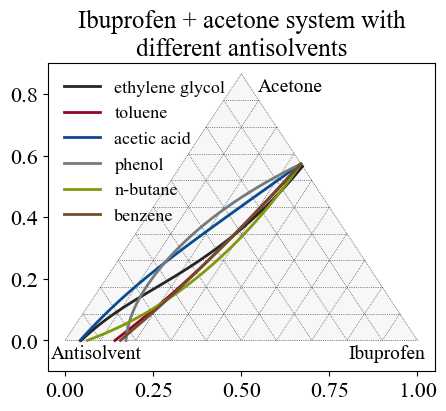

In [12]:
# ibuprofen + acetone system
ibu_directory = "./data/ibuprofen_calculation"
pattern = "IBUPROFEN_ACETONE_"

ibu_files = os.listdir(ibu_directory)
ibu_acetone_files = [filename for filename in ibu_files if re.match(pattern, filename)]

fig2, tax = ternary.figure()
fig2.set_size_inches(5, 4)
plt.grid(False)
tax.gridlines(multiple=0.1)
tax.set_title(f"Ibuprofen + acetone system with\ndifferent antisolvents")
tax.right_corner_label("Ibuprofen", fontsize=14, position=(0.85, 0.05))
tax.top_corner_label("Acetone", fontsize=14, position=(0.1, 1.05))
tax.left_corner_label("Antisolvent", fontsize=14, position=(0.1, 0.05))

for filename in ibu_acetone_files:
    filename_split = filename.split("_")
    if len(filename_split) == 3:
        antisolv_name = filename_split[2].lower()
    else:
        antisolv_name = filename_split[2] + " " + filename_split[3]
        antisolv_name = antisolv_name.lower()
    filepath = os.path.join(ibu_directory, filename)
    read_cols = [
        "solute_mol_fraction",
        "solvent_mol_fraction",
        "antisolvent_mol_fraction",
    ]
    ternary_data = pandas.read_csv(filepath, usecols=read_cols)
    ternary_data = ternary_data.values
    tax.plot(ternary_data, linewidth=2.0, label=antisolv_name)

plt.legend(loc="best", fontsize=13)
plt.savefig("./figures/ibuprofen_acetone_ternary.png", bbox_inches="tight")

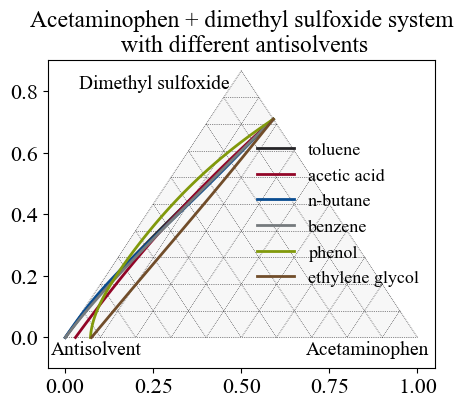

In [8]:
# acetaminophen + dimethyl sulfoxide system
acet_directory = "./data/acetaminophen_calculation"
pattern = "ACETAMINOPHEN_DIMETHYL_SULFOXIDE_"

acet_files = os.listdir(acet_directory)
acet_dimethyl_files = [
    filename for filename in acet_files if re.match(pattern, filename)
]

fig3, tax = ternary.figure()
fig3.set_size_inches(5, 4)
plt.grid(False)
tax.gridlines(multiple=0.1)
tax.set_title(
    f"Acetaminophen + dimethyl sulfoxide system\n with different antisolvents",
    fontsize=17,
)
tax.right_corner_label("Acetaminophen", fontsize=14, position=(0.8, 0.05))
tax.top_corner_label("Dimethyl sulfoxide", fontsize=14, position=(-0.25, 1.05))
tax.left_corner_label("Antisolvent", fontsize=14, position=(0.1, 0.05))

for filename in acet_dimethyl_files:
    filename_split = filename.split("_")
    if len(filename_split) == 4:
        antisolv_name = filename_split[3].lower()
    else:
        antisolv_name = filename_split[3] + " " + filename_split[4]
        antisolv_name = antisolv_name.lower()
    filepath = os.path.join(acet_directory, filename)
    read_cols = [
        "solute_mol_fraction",
        "solvent_mol_fraction",
        "antisolvent_mol_fraction",
    ]
    ternary_data = pandas.read_csv(filepath, usecols=read_cols)
    ternary_data = ternary_data.values
    tax.plot(ternary_data, linewidth=2.0, label=antisolv_name)

plt.legend(loc="center right", fontsize=13)
plt.savefig(
    "./figures/acetaminophen_dimethylsufloxide_ternary.png", bbox_inches="tight"
)

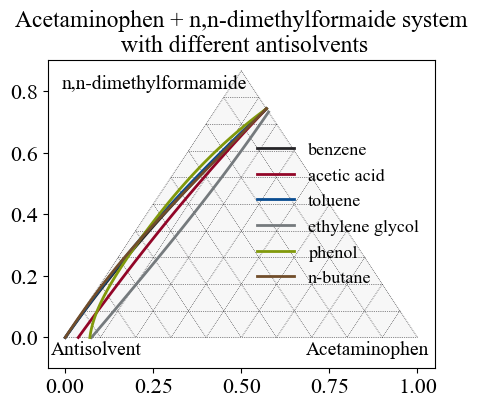

In [7]:
# acetaminophen + dimethyl sulfoxide system
acet_directory = "./data/acetaminophen_calculation"
pattern = "ACETAMINOPHEN_n,n-dimethylformamide_"

acet_files = os.listdir(acet_directory)
acet_dimethylform_files = [
    filename for filename in acet_files if re.match(pattern, filename)
]

fig4, tax = ternary.figure()
fig4.set_size_inches(5, 4)
plt.grid(False)
tax.gridlines(multiple=0.1)
tax.set_title(
    f"Acetaminophen + n,n-dimethylformaide system\n with different antisolvents",
    fontsize=17,
)
tax.right_corner_label("Acetaminophen", fontsize=14, position=(0.8, 0.05))
tax.top_corner_label("n,n-dimethylformamide", fontsize=14, position=(-0.25, 1.05))
tax.left_corner_label("Antisolvent", fontsize=14, position=(0.1, 0.05))

for filename in acet_dimethylform_files:
    filename_split = filename.split("_")
    if len(filename_split) == 3:
        antisolv_name = filename_split[2].lower()
    else:
        antisolv_name = filename_split[2] + " " + filename_split[3]
        antisolv_name = antisolv_name.lower()
    filepath = os.path.join(acet_directory, filename)
    read_cols = [
        "solute_mol_fraction",
        "solvent_mol_fraction",
        "antisolvent_mol_fraction",
    ]
    ternary_data = pandas.read_csv(filepath, usecols=read_cols)
    ternary_data = ternary_data.values
    tax.plot(ternary_data, linewidth=2.0, label=antisolv_name)

plt.legend(loc="center right", fontsize=13)
plt.savefig(
    "./figures/acetaminophen_n,n-dimethylformamide_ternary.png", bbox_inches="tight"
)

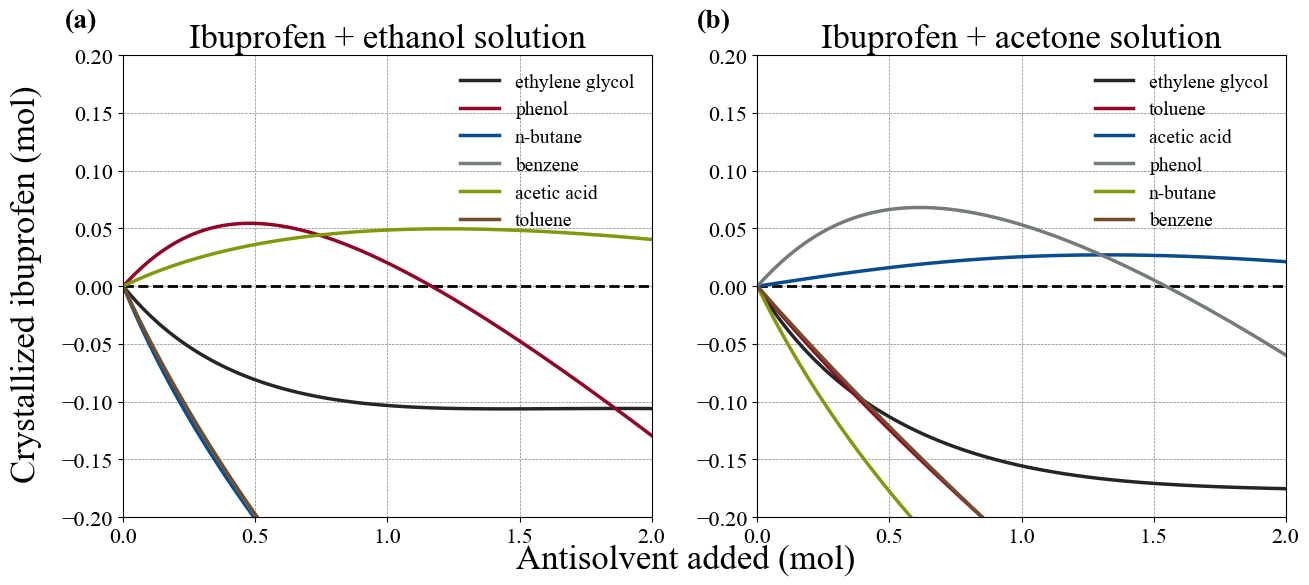

In [15]:
# Plot solute precipitation wrt antisolvent addition

# ibuprofen + ethanol system
ibu_directory = "./data/ibuprofen_calculation"
ethanol_pattern = "IBUPROFEN_ETHANOL_"

ibu_files = os.listdir(ibu_directory)
ibu_ethanol_files = [
    filename for filename in ibu_files if re.match(ethanol_pattern, filename)
]

# ibuprofen + actone system
acetone_pattern = "IBUPROFEN_ACETONE_"

ibu_acetone_files = [
    filename for filename in ibu_files if re.match(acetone_pattern, filename)
]

# Create figure
fig5, axes = plt.subplots(1, 2, figsize=(15, 6))
(ax1, ax2) = axes
fig5.text(0.5, 0.04, "Antisolvent added (mol)", ha="center", va="center", fontsize=25)
fig5.text(
    0.06,
    0.5,
    "Crystallized ibuprofen (mol)",
    ha="center",
    va="center",
    fontsize=25,
    rotation="vertical",
)

# ibuprofen + ethanol system
ax1.set_title("Ibuprofen + ethanol solution", fontsize=25)
ax1.set_xlim([0, 2])
ax1.set_ylim([-0.2, 0.2])
ax1.hlines(0, 0, 2, colors="k", linestyles="--")

for filename in ibu_ethanol_files:
    filename_split = filename.split("_")
    if len(filename_split) == 3:
        antisolv_name = filename_split[2].lower()
    else:
        antisolv_name = filename_split[2] + " " + filename_split[3]
        antisolv_name = antisolv_name.lower()
    filepath = os.path.join(ibu_directory, filename)
    read_cols = [
        "add_antisolv_mole",
        "precip_mole",
    ]
    precip_data = pandas.read_csv(filepath, usecols=read_cols)
    precip_data = precip_data.values

    add_antisolv_mole = precip_data[:, 0]
    precip_mole = precip_data[:, 1]

    ax1.plot(add_antisolv_mole, precip_mole, linewidth=2.5, label=antisolv_name)

ax1.legend(loc="upper right", fontsize=14)
ax1.text(
    -0.05,
    1.1,
    "(a)",
    transform=ax1.transAxes,
    fontsize=20,
    fontweight="bold",
    va="top",
    ha="right",
)

# ibuprofen + actone system

ax2.set_title("Ibuprofen + acetone solution", fontsize=25)
ax2.set_xlim([0, 2])
ax2.set_ylim([-0.2, 0.2])
ax2.hlines(0, 0, 2, colors="k", linestyles="--")

for filename in ibu_acetone_files:
    filename_split = filename.split("_")
    if len(filename_split) == 3:
        antisolv_name = filename_split[2].lower()
    else:
        antisolv_name = filename_split[2] + " " + filename_split[3]
        antisolv_name = antisolv_name.lower()
    filepath = os.path.join(ibu_directory, filename)
    read_cols = [
        "add_antisolv_mole",
        "precip_mole",
    ]
    precip_data = pandas.read_csv(filepath, usecols=read_cols)
    precip_data = precip_data.values

    add_antisolv_mole = precip_data[:, 0]
    precip_mole = precip_data[:, 1]

    ax2.plot(add_antisolv_mole, precip_mole, linewidth=2.5, label=antisolv_name)

ax2.legend(loc="upper right", fontsize=14)
ax2.text(
    -0.05,
    1.1,
    "(b)",
    transform=ax2.transAxes,
    fontsize=20,
    fontweight="bold",
    va="top",
    ha="right",
)

plt.savefig("./figures/ibuprofen_precipitation.png", bbox_inches="tight")

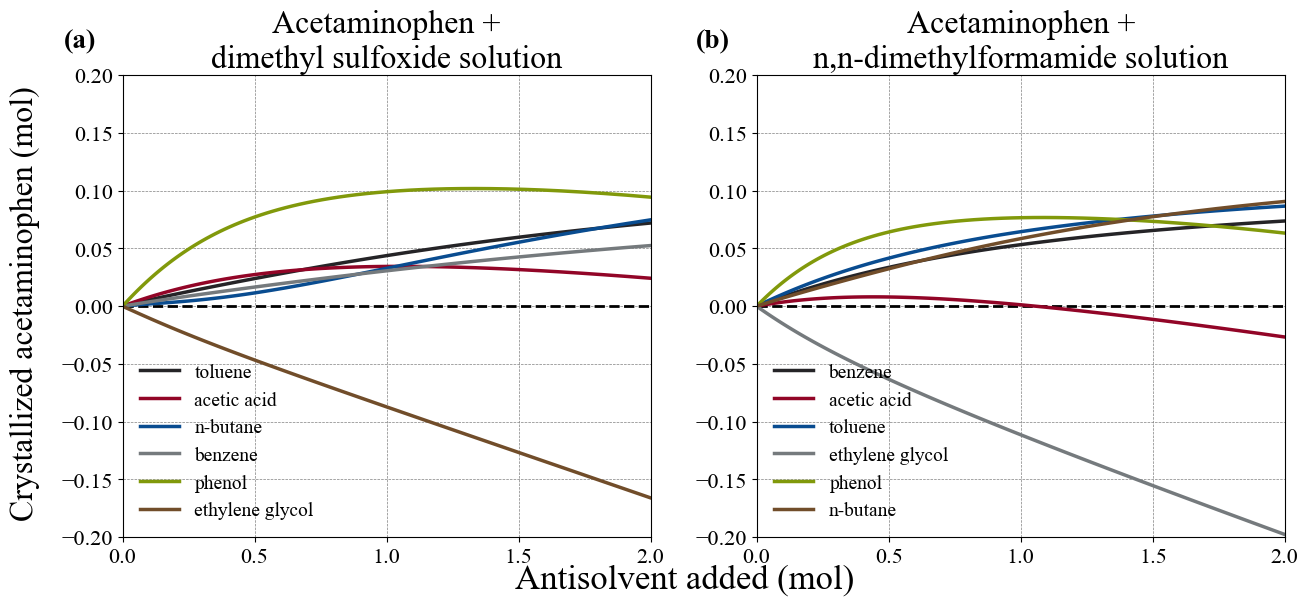

In [18]:
# acetaminophen + dimethyl sulfoxide system
acet_directory = "./data/acetaminophen_calculation"
dimethylsulf_pattern = "ACETAMINOPHEN_DIMETHYL_SULFOXIDE_"

acet_files = os.listdir(acet_directory)
acet_dimethylsulf_files = [
    filename for filename in acet_files if re.match(dimethylsulf_pattern, filename)
]

# acetaminophen + n,n-dimethylformamide system
dimethylform_pattern = "ACETAMINOPHEN_n,n-dimethylformamide_"

acet_dimethylform_files = [
    filename for filename in acet_files if re.match(dimethylform_pattern, filename)
]

# Create figure
fig6, axes = plt.subplots(1, 2, figsize=(15, 6))
(ax1, ax2) = axes
fig6.text(0.5, 0.04, "Antisolvent added (mol)", ha="center", va="center", fontsize=25)
fig6.text(
    0.06,
    0.5,
    "Crystallized acetaminophen (mol)",
    ha="center",
    va="center",
    fontsize=23,
    rotation="vertical",
)

# acetaminophen + dimethyl sulfoxide system
ax1.set_title("Acetaminophen +\ndimethyl sulfoxide solution", fontsize=23)
ax1.set_xlim([0, 2])
ax1.set_ylim([-0.2, 0.2])
ax1.hlines(0, 0, 2, colors="k", linestyles="--")

for filename in acet_dimethylsulf_files:
    filename_split = filename.split("_")
    if len(filename_split) == 4:
        antisolv_name = filename_split[3].lower()
    else:
        antisolv_name = filename_split[3] + " " + filename_split[4]
        antisolv_name = antisolv_name.lower()
    filepath = os.path.join(acet_directory, filename)
    read_cols = [
        "add_antisolv_mole",
        "precip_mole",
    ]
    precip_data = pandas.read_csv(filepath, usecols=read_cols)
    precip_data = precip_data.values

    add_antisolv_mole = precip_data[:, 0]
    precip_mole = precip_data[:, 1]

    ax1.plot(add_antisolv_mole, precip_mole, linewidth=2.5, label=antisolv_name)

ax1.legend(loc="lower left", fontsize=14)
ax1.text(
    -0.05,
    1.1,
    "(a)",
    transform=ax1.transAxes,
    fontsize=20,
    fontweight="bold",
    va="top",
    ha="right",
)

# Acetaminophen + n,n-dimethylformamide system

ax2.set_title("Acetaminophen +\nn,n-dimethylformamide solution", fontsize=23)
ax2.set_xlim([0, 2])
ax2.set_ylim([-0.2, 0.2])
ax2.hlines(0, 0, 2, colors="k", linestyles="--")

for filename in acet_dimethylform_files:
    filename_split = filename.split("_")
    if len(filename_split) == 3:
        antisolv_name = filename_split[2].lower()
    else:
        antisolv_name = filename_split[2] + " " + filename_split[3]
        antisolv_name = antisolv_name.lower()
    filepath = os.path.join(acet_directory, filename)
    read_cols = [
        "add_antisolv_mole",
        "precip_mole",
    ]
    precip_data = pandas.read_csv(filepath, usecols=read_cols)
    precip_data = precip_data.values

    add_antisolv_mole = precip_data[:, 0]
    precip_mole = precip_data[:, 1]

    ax2.plot(add_antisolv_mole, precip_mole, linewidth=2.5, label=antisolv_name)

ax2.legend(loc="lower left", fontsize=14)
ax2.text(
    -0.05,
    1.1,
    "(b)",
    transform=ax2.transAxes,
    fontsize=20,
    fontweight="bold",
    va="top",
    ha="right",
)

plt.savefig("./figures/acetaminophen_precipitation.png", bbox_inches="tight")

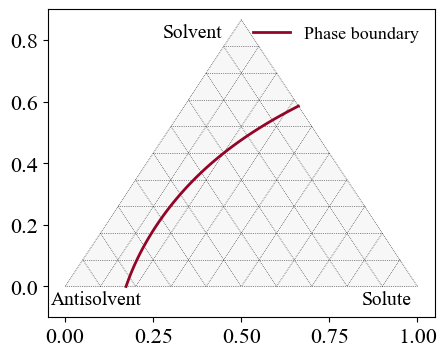

In [13]:
# Create sample figure for ternary SLE diagram

# ibuprofen + ethanol + phenol system
filepath = "./data/ibuprofen_calculation/IBUPROFEN_ETHANOL_PHENOL"

fig7, tax = ternary.figure()
fig7.set_size_inches(5, 4)
plt.grid(False)
tax.gridlines(multiple=0.1)
# tax.set_title(f"Ternary SLE composition of crystallizing solute with different amounts of antisolvent added")
tax.right_corner_label("Solute", fontsize=14, position=(0.85, 0.05))
tax.top_corner_label("Solvent", fontsize=14, position=(-0.15, 1.05))
tax.left_corner_label("Antisolvent", fontsize=14, position=(0.1, 0.05))

read_cols = [
    "solute_mol_fraction",
    "solvent_mol_fraction",
    "antisolvent_mol_fraction",
]
ternary_data = pandas.read_csv(filepath, usecols=read_cols)
ternary_data = ternary_data.values
tax.plot(ternary_data, linewidth=2.0, color="#920527", label="Phase boundary")

plt.legend(loc="upper right", fontsize=13)
plt.savefig("./figures/ternary_sle_example.png", bbox_inches="tight")

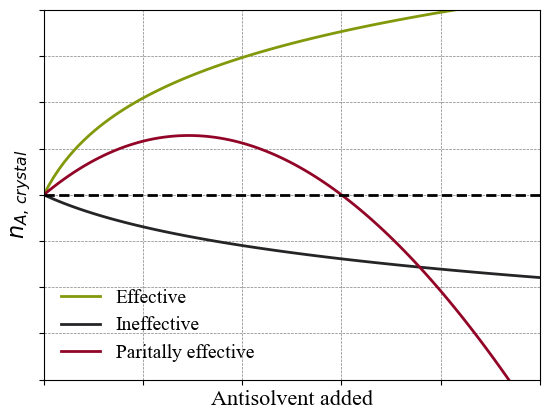

In [35]:
# Create example figure for screening methodology explanation
def y1(x):
    out = 0.8 * np.log(2.7 * x + 1)
    return out


def y2(x):
    out = -0.5 * np.log(x + 1)
    return out


def y3(x):
    out = 0.01 * x * (x - 3) * (x - 30)
    return out


fig8, ax = plt.subplots()

x_data = np.linspace(0, 5.0, 100)

ax.plot(x_data, y1(x_data), color="#81990B", label="Effective")
ax.plot(x_data, y2(x_data), label="Ineffective")
ax.plot(x_data, y3(x_data), label="Paritally effective")
ax.hlines(0, 0, 5, colors="k", linestyles="--")

ax.set_xlim([0, 5])
ax.set_ylim([-2, 2])
ax.set_xlabel("Antisolvent added", fontsize=16)
ax.set_ylabel(r"$n_{A,\,crystal}$", fontsize=16)
ax.tick_params(axis="x", which="both", labelbottom=False)
ax.tick_params(axis="y", which="both", labelleft=False)

plt.legend(loc="best")

plt.savefig("./figures/screening_example.png", bbox_inches="tight")